In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Reshape
import cv2
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = "G:\Projects\pject based learning ML\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images"

In [5]:
os.listdir(data_dir)

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [6]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1835 files belonging to 30 classes.


In [7]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
scaled = batch[0] / 255

In [11]:
scaled.max()

1.0

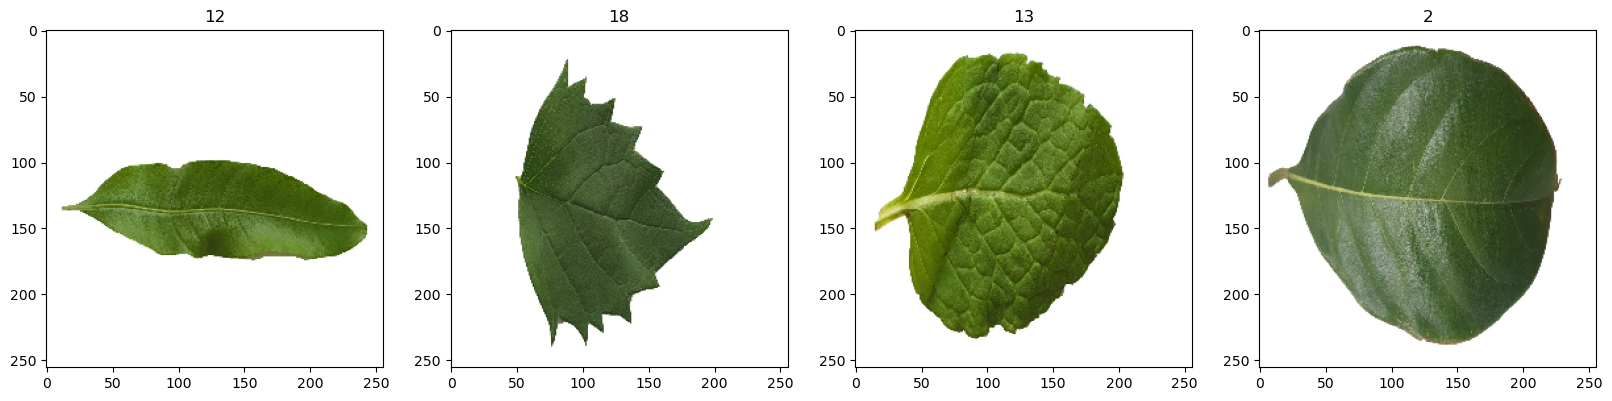

In [12]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
#PREPROCESSING

In [14]:
def preprocess(x, y):
    x = x / 255
    y = tf.one_hot(y, 30)
    return x, y

data = data.map(preprocess)

In [15]:
sacled_iterator = data.as_numpy_iterator()

In [16]:
batch = sacled_iterator.next()

C:\Users\sopha\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


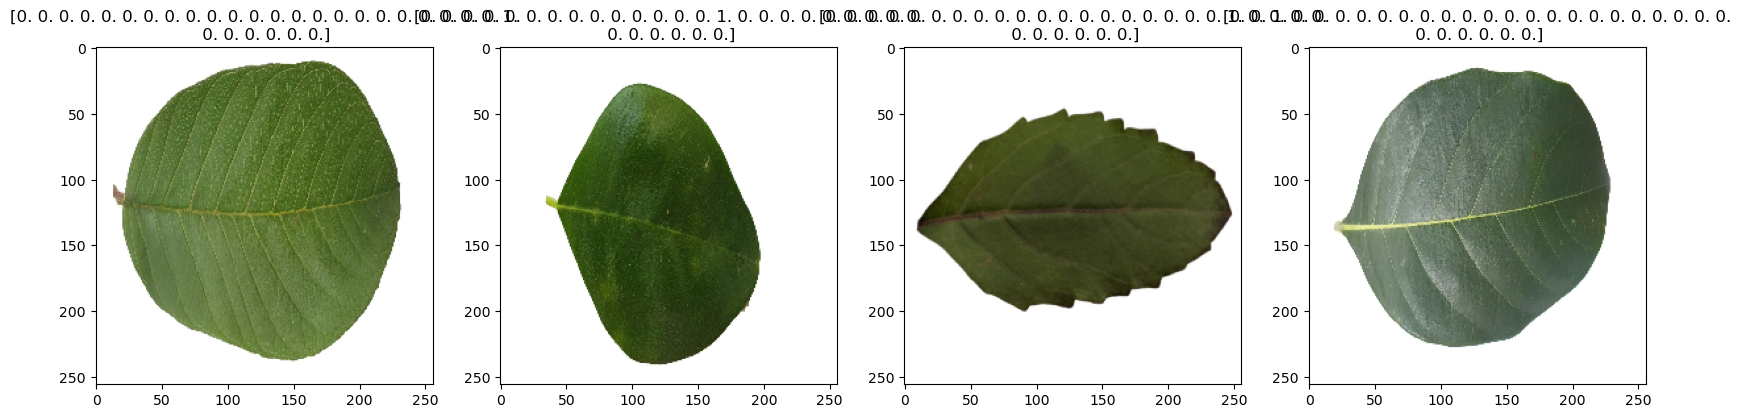

In [17]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
#SPLITTING

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [20]:
train_size + test_size +val_size

58

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
#MODEL

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(30, activation='softmax'))

In [25]:
model.compile('adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [27]:
#TRAIN

In [28]:
logdir = "G:/Projects/pject based learning ML/logs"

In [29]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
model.fit(train, epochs = 20, validation_data=val, callbacks=[tesorboard_callback])

Epoch 1/20
40/40 [==============================] - 32s 736ms/step - loss: 3.0070 - accuracy: 0.1578 - val_loss: 1.9359 - val_accuracy: 0.4505
Epoch 2/20
40/40 [==============================] - 29s 693ms/step - loss: 1.5858 - accuracy: 0.5195 - val_loss: 1.1734 - val_accuracy: 0.6406
Epoch 3/20
40/40 [==============================] - 29s 697ms/step - loss: 1.0357 - accuracy: 0.6805 - val_loss: 0.9491 - val_accuracy: 0.6979
Epoch 4/20
40/40 [==============================] - 29s 695ms/step - loss: 0.8182 - accuracy: 0.7500 - val_loss: 0.7966 - val_accuracy: 0.7604
Epoch 5/20
40/40 [==============================] - 29s 712ms/step - loss: 0.5624 - accuracy: 0.8156 - val_loss: 0.5230 - val_accuracy: 0.8385
Epoch 6/20
40/40 [==============================] - 29s 710ms/step - loss: 0.4494 - accuracy: 0.8594 - val_loss: 0.5883 - val_accuracy: 0.8151
Epoch 7/20
40/40 [==============================] - 30s 713ms/step - loss: 0.3285 - accuracy: 0.8914 - val_loss: 0.5189 - val_accuracy: 0.8464

In [31]:
#PLOTTING PERFORMANCE

In [45]:
hist = model.evaluate(test)

6/6 [==============================] - 4s 91ms/step - loss: 0.7173 - accuracy: 0.8772


In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

AttributeError: 'list' object has no attribute 'history'

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'], hist.history['accuracy'])
plt.title('Training Loss vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
plt.plot(hist.history['loss'], hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_loss'], hist.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Loss')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#EVALUATION

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X,y = batch
    ypred = model.predict(X)
    pre.update_state(y, ypred)
    re.update_state(y, ypred)
    acc.update_state(y, ypred)

1/1 [==============================] - 0s 157ms/step


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.886227548122406, Recall:0.8654970526695251, Accuracy:0.9918128848075867


In [ ]:
#TEST

In [ ]:
img = tf.image.decode_jpeg(tf.io.read_file("G:\Projects\pject based learning ML\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Hibiscus Rosa-sinensis\HR-S-001.jpg"), channels=3) # replace 'image.jpg' with the path to your image
resized = tf.image.resize(img, (256,256))
padded = tf.image.pad_to_bounding_box(resized, 0, 0, 256, 256)
plt.imshow(padded.numpy().astype(int))
plt.show()

In [ ]:
ypred = model.predict(np.expand_dims(resized / 255, 0))

In [ ]:
ypred

In [ ]:
pred_classes = np.argmax(ypred, axis=1)

In [ ]:
for i in range(len(pred_classes)):
    print(f"Predicted class for sample {i}: {class_dict[pred_classes[i]]}")

In [ ]:
class_dict =["Rasna",
             "Arive-Dantu",
             "Jackfruit",
             "Neem",
             "Basale",
             "Indian Mustard",
             "Karanda",
             "Lemon",
             "Roxburgh fig",
             "Peepal Tree",
             "Hibiscus",
             "Jasmine",
             "Mango",
             "Mint",
             "Drumstick",
             "Jamaica Cherry-Gasagase",
             "Curry",
             "Oleander",
             "Parijata",
             "Tulsi",
             "Betel",
             "Mexican Mint",
             "Indian Beech",
             "Guava",
             "Pomegranate",
             "Sandalwood",
             "Jamun",
             "Rose Apple",
             "Crape Jasmine",
             "Fenugreek"]

In [ ]:
#MODEL SAVING

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("G:\Projects\pject based learning ML", 'MedicinalPlant.h5'))

In [ ]:
#Model testin

In [ ]:
newmodel = load_model(os.path.join('models', "G:\Projects\pject based learning ML\MedicinalPlant.h5"))

In [ ]:
newypred = newmodel.predict(np.expand_dims(resized / 255, 0))

In [ ]:
pred_classes = np.argmax(newypred, axis=1)

In [ ]:
for i in range(len(pred_classes)):
    hi = class_dict[pred_classes[i]]
    print(f"Predicted class for sample {i}: {class_dict[pred_classes[i]]}")

In [ ]:
hi